# Project 1 - Credit Fraud

## Load in data and create visual to see possible trends

In [35]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import naive_bayes
from sklearn import utils

In [36]:
#reading files
df = pd.read_csv("D:/GitHub/data/dsc680/fraudTrain.csv")
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [37]:
#check num of na
df.isna().sum().sum()

0

In [38]:
#removing index column
df = df.iloc[:,1:]
print(df.head())
print(df.columns)

  trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city state    zip      lat  \
0                561 Perry Cove  Moravian Falls    NC  28654  36.0788   
1  43039 Riley Greens Suite 393     

In [39]:
#check unique credit card number, fraud attacks tend to hit one credit card alot of times in a short period of times at low expences
#print(df['cc_num'].value_counts())
#looking at number of fraud
print("Count of fraud vs non fraud charges\n")
print(df['is_fraud'].value_counts())
#looking at number of fraud charges and unique cards
print("\nNumber of charges per card that has fraud:\n")
print(df[df['is_fraud'] == 1]['cc_num'].value_counts())
#looking at number unique cards that have fraud charges
print("\nNumber of unique cards to have fraud charges:\n")
print(len(df[df['is_fraud'] == 1]['cc_num'].unique()))

Count of fraud vs non fraud charges

0    1289169
1       7506
Name: is_fraud, dtype: int64

Number of charges per card that has fraud:

3520550088202337       19
4593569795412          19
4260128500325          18
4400011257587661852    16
4629451965224809       16
                       ..
4503101193493052864     2
4809701904914           2
4005676619255478        2
6011109736646996        2
4089096483689733451     2
Name: cc_num, Length: 762, dtype: int64

Number of unique cards to have fraud charges:

762


In [40]:
#Looking at correlation of values
df.corr()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
cc_num,1.000000,0.001769,0.041459,-0.059271,-0.048278,-0.008991,0.000354,-0.058942,-0.048252,-0.000981
amt,0.001769,1.000000,0.001843,-0.001926,-0.000187,0.005818,-0.000293,-0.001873,-0.000151,0.219404
zip,0.041459,0.001843,1.000000,-0.114290,-0.909732,0.078467,0.000670,-0.113561,-0.908924,-0.002162
lat,-0.059271,-0.001926,-0.114290,1.000000,-0.015533,-0.155730,0.000632,0.993592,-0.015509,0.001894
long,-0.048278,-0.000187,-0.909732,-0.015533,1.000000,-0.052715,-0.000642,-0.015452,0.999120,0.001721
city_pop,-0.008991,0.005818,0.078467,-0.155730,-0.052715,1.000000,-0.001714,-0.154781,-0.052687,0.002136
unix_time,0.000354,-0.000293,0.000670,0.000632,-0.000642,-0.001714,1.000000,0.000561,-0.000635,-0.005078
merch_lat,-0.058942,-0.001873,-0.113561,0.993592,-0.015452,-0.154781,0.000561,1.000000,-0.015431,0.001741
merch_long,-0.048252,-0.000151,-0.908924,-0.015509,0.999120,-0.052687,-0.000635,-0.015431,1.000000,0.001721
is_fraud,-0.000981,0.219404,-0.002162,0.001894,0.001721,0.002136,-0.005078,0.001741,0.001721,1.000000


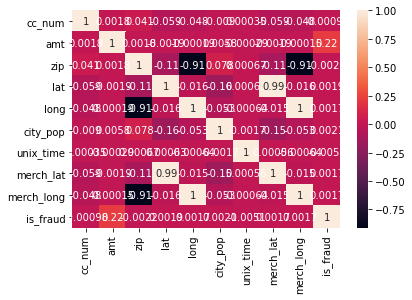

In [41]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [42]:
df.apply(lambda x: x.factorize()[0]).corr()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
trans_date_trans_time,1.000000,0.002475,0.001556,-0.000063,0.050232,0.000469,0.001677,-0.000946,0.002475,0.002467,0.001220,0.002424,0.002406,0.002333,0.002414,0.001082,0.002574,0.999999,1.000000,0.962475,0.983882,-0.004777
cc_num,0.002475,1.000000,-0.000405,-0.002461,0.003603,0.404395,0.554262,0.053981,1.000000,0.929132,0.086740,0.985516,0.984086,0.982925,0.923754,0.588202,0.984916,0.002474,0.002475,0.003736,0.002049,0.029358
merchant,0.001556,-0.000405,1.000000,0.600791,-0.053391,-0.002894,0.000016,0.003712,-0.000405,-0.000895,-0.001758,-0.000573,-0.000631,-0.000590,-0.000255,-0.000163,-0.000724,0.001558,0.001556,0.001378,0.001323,-0.034868
category,-0.000063,-0.002461,0.600791,1.000000,-0.077282,-0.002047,-0.000060,-0.003711,-0.002461,-0.003157,-0.001749,-0.002507,-0.002551,-0.002599,-0.002463,-0.000254,-0.002942,-0.000061,-0.000063,-0.000071,-0.000097,-0.039249
amt,0.050232,0.003603,-0.053391,-0.077282,1.000000,-0.007050,-0.000441,-0.019953,0.003603,0.002221,-0.010552,0.004085,0.004090,0.003665,0.002295,0.000960,0.002177,0.050207,0.050232,0.049254,0.049968,0.181432
first,0.000469,0.404395,-0.002894,-0.002047,-0.007050,1.000000,0.286354,-0.104190,0.404395,0.389153,0.119001,0.404675,0.404238,0.405104,0.400056,0.294307,0.400812,0.000469,0.000469,0.000299,0.000137,0.009605
last,0.001677,0.554262,0.000016,-0.000060,-0.000441,0.286354,1.000000,0.052746,0.554262,0.522364,0.035378,0.545857,0.546503,0.547031,0.516152,0.341050,0.552703,0.001676,0.001677,0.002184,0.001355,0.012285
gender,-0.000946,0.053981,0.003712,-0.003711,-0.019953,-0.104190,0.052746,1.000000,0.053981,0.048795,-0.038210,0.053661,0.052264,0.051326,0.061168,0.027344,0.041430,-0.000945,-0.000946,-0.001761,-0.000892,0.007642
street,0.002475,1.000000,-0.000405,-0.002461,0.003603,0.404395,0.554262,0.053981,1.000000,0.929132,0.086740,0.985516,0.984086,0.982925,0.923754,0.588202,0.984916,0.002474,0.002475,0.003736,0.002049,0.029358
city,0.002467,0.929132,-0.000895,-0.003157,0.002221,0.389153,0.522364,0.048795,0.929132,1.000000,0.096590,0.943006,0.941497,0.940307,0.938401,0.545040,0.915821,0.002466,0.002467,0.003287,0.002047,0.023724


In [43]:
pd.set_option('display.max_columns', 25)

Text(0.5, 1.0, 'Graph3')

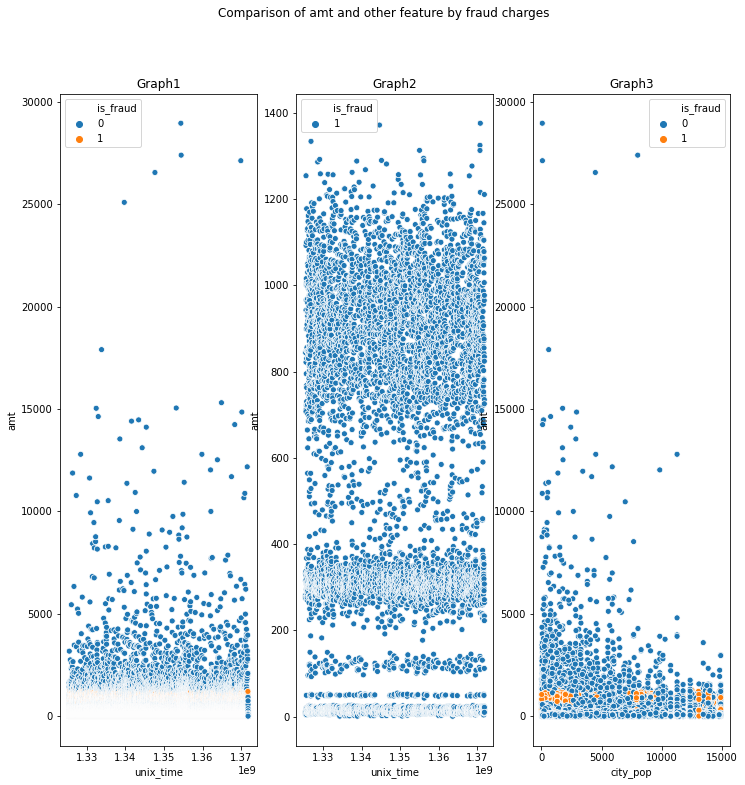

In [44]:
fig, axes = plt.subplots(1,3,figsize=(12,12))
fig.suptitle("Comparison of amt and other feature by fraud charges")
sns.scatterplot(ax = axes[0], data=df, x='unix_time', y='amt', hue='is_fraud')
axes[0].set_title("Graph1")
sns.scatterplot(ax = axes[1], data=df[df['is_fraud'] == 1], x='unix_time', y='amt', hue='is_fraud')
axes[1].set_title("Graph2")
sns.scatterplot(ax = axes[2], data=df[df['city_pop'] < 15000], x='city_pop', y='amt', hue='is_fraud')
axes[2].set_title("Graph3")

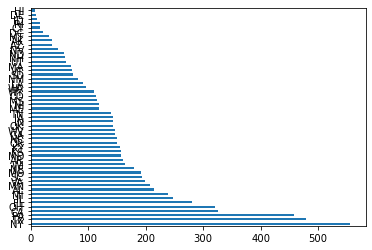

In [45]:
state_count = pd.value_counts(df[df['is_fraud'] == 1]['state'].values)
state_count.plot.barh()

In [46]:
#label encoding to try with all sig values
df["merchant"] = df['merchant'].astype('category')
df["category"] = df["category"].astype('category')
df["street"] = df["street"].astype('category')
df["merch"] = df['merchant'].cat.codes
df["cat"] = df["category"].cat.codes
df["st"] = df["street"].cat.codes
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch,cat,st
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,514,8,568
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,241,4,435
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,390,0,602
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,360,2,930
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,297,9,418


In [47]:
df.corr()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,merch,cat,st
cc_num,1.000000,0.001769,0.041459,-0.059271,-0.048278,-0.008991,0.000354,-0.058942,-0.048252,-0.000981,0.000055,0.001230,0.046509
amt,0.001769,1.000000,0.001843,-0.001926,-0.000187,0.005818,-0.000293,-0.001873,-0.000151,0.219404,-0.002633,0.030867,0.001346
zip,0.041459,0.001843,1.000000,-0.114290,-0.909732,0.078467,0.000670,-0.113561,-0.908924,-0.002162,0.001113,0.002371,-0.053860
lat,-0.059271,-0.001926,-0.114290,1.000000,-0.015533,-0.155730,0.000632,0.993592,-0.015509,0.001894,-0.002266,-0.008660,-0.012651
long,-0.048278,-0.000187,-0.909732,-0.015533,1.000000,-0.052715,-0.000642,-0.015452,0.999120,0.001721,-0.000697,-0.000767,0.071328
city_pop,-0.008991,0.005818,0.078467,-0.155730,-0.052715,1.000000,-0.001714,-0.154781,-0.052687,0.002136,0.001911,0.009386,-0.012530
unix_time,0.000354,-0.000293,0.000670,0.000632,-0.000642,-0.001714,1.000000,0.000561,-0.000635,-0.005078,-0.000999,0.000182,-0.001089
merch_lat,-0.058942,-0.001873,-0.113561,0.993592,-0.015452,-0.154781,0.000561,1.000000,-0.015431,0.001741,-0.002263,-0.008519,-0.012517
merch_long,-0.048252,-0.000151,-0.908924,-0.015509,0.999120,-0.052687,-0.000635,-0.015431,1.000000,0.001721,-0.000673,-0.000736,0.071286
is_fraud,-0.000981,0.219404,-0.002162,0.001894,0.001721,0.002136,-0.005078,0.001741,0.001721,1.000000,-0.000536,0.020205,0.001448


In [48]:
#split data so that there are equal part fraud and non fraud
fraud = df[df["is_fraud"] == 1]
nf = df[df["is_fraud"] == 0]

testF = fraud.sample(frac= 0.3)

trainF = fraud.drop(testF.index)

testN = nf.sample(frac= 0.3)

trainN = nf.drop(testN.index)

train = trainF.append(trainN)
test = testF.append(testN)

print(train.head())
print(test.head())



     trans_date_trans_time           cc_num                  merchant  \
2449   2019-01-02 01:06:37    4613314721966    fraud_Rutherford-Mertz   
2546   2019-01-02 03:38:03    4613314721966    fraud_Erdman-Kertzmann   
2553   2019-01-02 03:55:47  340187018810220        fraud_Koepp-Parker   
3527   2019-01-02 23:52:08    4613314721966       fraud_Ruecker Group   
3580   2019-01-03 01:05:27  340187018810220  fraud_Conroy-Cruickshank   

           category     amt  first    last gender                     street  \
2449    grocery_pos  281.06  Jason  Murphy      M  542 Steve Curve Suite 011   
2546  gas_transport    7.03  Jason  Murphy      M  542 Steve Curve Suite 011   
2553    grocery_pos  275.73  Misty    Hart      F  27954 Hall Mill Suite 575   
3527       misc_net  843.91  Jason  Murphy      M  542 Steve Curve Suite 011   
3580  gas_transport   10.76  Misty    Hart      F  27954 Hall Mill Suite 575   

               city state    zip      lat     long  city_pop  \
2449  Collettsvi

In [49]:
x_train = train[["cc_num","amt","zip","long","lat"]]
y_train = train["is_fraud"]

x_test = test[["cc_num","amt","zip","long","lat"]]
y_test = test["is_fraud"]

In [50]:
#creating function to analyze classifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Print out common error metrics for the binary classifications.
def print_multiclass_classif_error_report(y_test, preds):
    print('Accuracy: ' + str(accuracy_score(y_test, preds)))
    print('Avg. F1 (Micro): ' + str(f1_score(y_test, preds, average='micro')))
    print('Avg. F1 (Macro): ' + str(f1_score(y_test, preds, average='macro')))
    print('Avg. F1 (Weighted): ' + str(f1_score(y_test, preds, average='weighted')))
    print(classification_report(y_test, preds))
    print("Confusion Matrix:\n" + str(confusion_matrix(y_test, preds)))

In [51]:
#naive bayes model
gnb_mod = naive_bayes.GaussianNB()
gnb_mod.fit(x_train,y_train)

pred = gnb_mod.predict(x_test)
print_multiclass_classif_error_report(y_test, pred)

Accuracy: 0.9942108415616332
Avg. F1 (Micro): 0.9942108415616332
Avg. F1 (Macro): 0.4985485089345334
Avg. F1 (Weighted): 0.9913246652541997


C:\Users\Matt Kline\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    386751
           1       0.00      0.00      0.00      2252

    accuracy                           0.99    389003
   macro avg       0.50      0.50      0.50    389003
weighted avg       0.99      0.99      0.99    389003

Confusion Matrix:
[[386751      0]
 [  2252      0]]


In [52]:
#going to run same code as above but with data that is equal part fraud and no fraud
fraud = df[df["is_fraud"] == 1]
no = df[df["is_fraud"] == 0]

no = no.sample(n=len(fraud))

print(len(fraud))
print(len(no))

df2 = fraud
df2 = df2.append(no)
df2 = utils.shuffle(df2)
df2.head()

7506
7506


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch,cat,st
27670,2019-01-16 23:32:14,6011366578560244,"fraud_Romaguera, Cruickshank and Greenholt",shopping_net,1125.31,Adam,Stark,M,0912 Mark Fields Apt. 080,Mc Veytown,PA,17051,40.5046,-77.7186,4653,Nutritional therapist,1997-07-01,b0015839d697350a352dcef5382e6ff8,1326756734,39.839436,-77.286704,1,528,11,88
2552,2019-01-02 03:55:32,4878364946692291,fraud_Schmitt Ltd,misc_net,5.37,Tina,Alvarez,F,1976 Tyler Underpass,Early,IA,50535,42.4483,-95.1726,885,"Pilot, airline",1949-08-14,180516e5f27fa0ded08e21608adbff54,1325476532,43.170473,-95.041970,0,560,8,191
847913,2019-12-15 05:07:11,30427035050508,"fraud_Rowe, Batz and Goodwin",grocery_pos,52.20,John,Chandler,M,88325 Brandon Greens Apt. 477,Detroit,MI,48202,42.3770,-83.0796,673342,Broadcast presenter,1969-11-20,abf364d5d2bc143ee88403ceb898255e,1355548031,43.135862,-84.043573,0,533,4,876
506403,2019-08-07 22:50:50,6011388901471808,fraud_Boyer PLC,shopping_net,1120.05,Jacqueline,Marsh,F,950 Sheryl Spurs,Dunlevy,PA,15432,40.1151,-79.8627,427,Mining engineer,1951-02-05,ab0d051e73169b896457b5562efbeb90,1344379850,39.439698,-80.720805,1,70,11,938
1027652,2020-03-02 01:07:38,345389171551808,fraud_DuBuque LLC,grocery_pos,327.98,Justin,Fowler,M,5569 Phillips Neck Apt. 003,Coffeeville,MS,38922,33.9215,-89.6782,3451,Financial trader,1984-05-19,480d64cd1a6cdb65c6731cb8fa514c3c,1362186458,34.346060,-88.940221,1,147,4,562


In [53]:
x = df2[["cc_num","amt","zip","long","lat"]]
y = df2["is_fraud"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 4)

gnb_mod = naive_bayes.GaussianNB()

gnb_mod.fit(x_train, y_train)

preds = gnb_mod.predict(x_test)
print_multiclass_classif_error_report(y_test, preds)

Accuracy: 0.5037744227353463
Avg. F1 (Micro): 0.5037744227353463
Avg. F1 (Macro): 0.40345632938295983
Avg. F1 (Weighted): 0.40247867606387866
              precision    recall  f1-score   support

           0       0.53      0.09      0.16      2261
           1       0.50      0.92      0.65      2243

    accuracy                           0.50      4504
   macro avg       0.52      0.51      0.40      4504
weighted avg       0.52      0.50      0.40      4504

Confusion Matrix:
[[ 211 2050]
 [ 185 2058]]


In [54]:
#label encoding to try with all sig values
df2["merchant"] = df2['merchant'].astype('category')
df2["category"] = df2["category"].astype('category')
df2["street"] = df2["street"].astype('category')
df2["merch"] = df2['merchant'].cat.codes
df2["cat"] = df2["category"].cat.codes
df2["st"] = df2["street"].cat.codes
df2.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch,cat,st
27670,2019-01-16 23:32:14,6011366578560244,"fraud_Romaguera, Cruickshank and Greenholt",shopping_net,1125.31,Adam,Stark,M,0912 Mark Fields Apt. 080,Mc Veytown,PA,17051,40.5046,-77.7186,4653,Nutritional therapist,1997-07-01,b0015839d697350a352dcef5382e6ff8,1326756734,39.839436,-77.286704,1,528,11,88
2552,2019-01-02 03:55:32,4878364946692291,fraud_Schmitt Ltd,misc_net,5.37,Tina,Alvarez,F,1976 Tyler Underpass,Early,IA,50535,42.4483,-95.1726,885,"Pilot, airline",1949-08-14,180516e5f27fa0ded08e21608adbff54,1325476532,43.170473,-95.041970,0,560,8,191
847913,2019-12-15 05:07:11,30427035050508,"fraud_Rowe, Batz and Goodwin",grocery_pos,52.20,John,Chandler,M,88325 Brandon Greens Apt. 477,Detroit,MI,48202,42.3770,-83.0796,673342,Broadcast presenter,1969-11-20,abf364d5d2bc143ee88403ceb898255e,1355548031,43.135862,-84.043573,0,533,4,876
506403,2019-08-07 22:50:50,6011388901471808,fraud_Boyer PLC,shopping_net,1120.05,Jacqueline,Marsh,F,950 Sheryl Spurs,Dunlevy,PA,15432,40.1151,-79.8627,427,Mining engineer,1951-02-05,ab0d051e73169b896457b5562efbeb90,1344379850,39.439698,-80.720805,1,70,11,938
1027652,2020-03-02 01:07:38,345389171551808,fraud_DuBuque LLC,grocery_pos,327.98,Justin,Fowler,M,5569 Phillips Neck Apt. 003,Coffeeville,MS,38922,33.9215,-89.6782,3451,Financial trader,1984-05-19,480d64cd1a6cdb65c6731cb8fa514c3c,1362186458,34.346060,-88.940221,1,147,4,562


In [55]:
#try with included columns
x = df2[["cc_num","amt","zip","long","lat","merch","cat","st"]]
y = df2["is_fraud"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 4)

gnb_mod = naive_bayes.GaussianNB()

gnb_mod.fit(x_train, y_train)

preds = gnb_mod.predict(x_test)
print_multiclass_classif_error_report(y_test, preds)

Accuracy: 0.5037744227353463
Avg. F1 (Micro): 0.5037744227353463
Avg. F1 (Macro): 0.40345632938295983
Avg. F1 (Weighted): 0.40247867606387866
              precision    recall  f1-score   support

           0       0.53      0.09      0.16      2261
           1       0.50      0.92      0.65      2243

    accuracy                           0.50      4504
   macro avg       0.52      0.51      0.40      4504
weighted avg       0.52      0.50      0.40      4504

Confusion Matrix:
[[ 211 2050]
 [ 185 2058]]


In [56]:
df2.corr()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,merch,cat,st
cc_num,1.000000,0.014889,0.040887,-0.041670,-0.040556,-0.009842,0.006858,-0.043060,-0.040636,-0.005059,0.001217,0.004730,0.001014
amt,0.014889,1.000000,-0.017854,0.009435,0.014234,0.018743,-0.004959,0.008849,0.014435,0.601883,-0.000757,0.432095,0.004255
zip,0.040887,-0.017854,1.000000,-0.087938,-0.912835,0.103120,0.002795,-0.087147,-0.911881,-0.014545,-0.004141,-0.003625,-0.026559
lat,-0.041670,0.009435,-0.087938,1.000000,-0.060626,-0.170461,-0.018914,0.993639,-0.060236,0.013482,0.005094,-0.008171,0.012806
long,-0.040556,0.014234,-0.912835,-0.060626,1.000000,-0.074231,0.002106,-0.060983,0.999142,0.011141,0.006040,0.003334,0.041241
city_pop,-0.009842,0.018743,0.103120,-0.170461,-0.074231,1.000000,-0.003356,-0.170098,-0.074012,0.010562,-0.001078,0.010077,-0.011907
unix_time,0.006858,-0.004959,0.002795,-0.018914,0.002106,-0.003356,1.000000,-0.019259,0.002312,-0.025149,0.009401,0.003533,-0.000660
merch_lat,-0.043060,0.008849,-0.087147,0.993639,-0.060983,-0.170098,-0.019259,1.000000,-0.060577,0.012566,0.006220,-0.008341,0.013009
merch_long,-0.040636,0.014435,-0.911881,-0.060236,0.999142,-0.074012,0.002312,-0.060577,1.000000,0.011088,0.005802,0.004456,0.041319
is_fraud,-0.005059,0.601883,-0.014545,0.013482,0.011141,0.010562,-0.025149,0.012566,0.011088,1.000000,0.000430,0.132226,0.014369


In [57]:
x = df2[["cc_num","amt","zip","long","lat","merch_long","merch_lat","cat"]]
y = df2["is_fraud"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 4)

gnb_mod = naive_bayes.GaussianNB()

gnb_mod.fit(x_train, y_train)

preds = gnb_mod.predict(x_test)
print_multiclass_classif_error_report(y_test, preds)

Accuracy: 0.5037744227353463
Avg. F1 (Micro): 0.5037744227353463
Avg. F1 (Macro): 0.40345632938295983
Avg. F1 (Weighted): 0.40247867606387866
              precision    recall  f1-score   support

           0       0.53      0.09      0.16      2261
           1       0.50      0.92      0.65      2243

    accuracy                           0.50      4504
   macro avg       0.52      0.51      0.40      4504
weighted avg       0.52      0.50      0.40      4504

Confusion Matrix:
[[ 211 2050]
 [ 185 2058]]


In [58]:
x = df2[["amt","cat"]]
y = df2["is_fraud"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 4)

gnb_mod = naive_bayes.GaussianNB()

gnb_mod.fit(x_train, y_train)

preds = gnb_mod.predict(x_test)
print_multiclass_classif_error_report(y_test, preds)

Accuracy: 0.7495559502664298
Avg. F1 (Micro): 0.7495559502664298
Avg. F1 (Macro): 0.7354508463053497
Avg. F1 (Weighted): 0.7356949731046761
              precision    recall  f1-score   support

           0       0.67      0.98      0.80      2261
           1       0.96      0.52      0.67      2243

    accuracy                           0.75      4504
   macro avg       0.81      0.75      0.74      4504
weighted avg       0.81      0.75      0.74      4504

Confusion Matrix:
[[2208   53]
 [1075 1168]]


In [59]:
#trying original size model with best smaller modal features
x_train = train[["amt","cat"]]
y_train = train["is_fraud"]

x_test = test[["amt","cat"]]
y_test = test["is_fraud"]
#naive bayes model
gnb_mod = naive_bayes.GaussianNB()
gnb_mod.fit(x_train,y_train)

pred = gnb_mod.predict(x_test)
print_multiclass_classif_error_report(y_test, pred)


Accuracy: 0.9909460852486999
Avg. F1 (Micro): 0.9909460852486999
Avg. F1 (Macro): 0.6826933068109711
Avg. F1 (Weighted): 0.991819197316844
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    386751
           1       0.31      0.46      0.37      2252

    accuracy                           0.99    389003
   macro avg       0.65      0.73      0.68    389003
weighted avg       0.99      0.99      0.99    389003

Confusion Matrix:
[[384447   2304]
 [  1218   1034]]


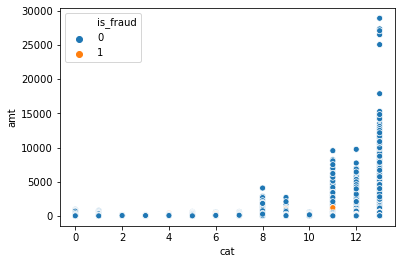

In [60]:
sns.scatterplot(data=df, x='cat', y='amt', hue='is_fraud')

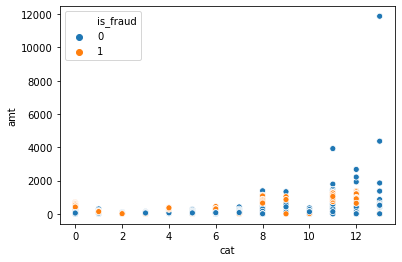

In [61]:
sns.scatterplot(data=df2, x='cat', y='amt', hue='is_fraud')